# Sentiment Analysis
Sentiment analysis is the name given to the process of extracting the sentiment from a text (or classifying it into categories such as positive, negative and neutral).
It is possible for the classification to also contain extra information regarding how intense this sentiment is (e.g. not just positive/negative, but very positive, positive, negative, very negative) as well as nuanced emotions.

### Lexicon-based Sentiment

Lexicons are dictionaries that contain a collection of words and their corresponding sentiment value (for example ‘happy’ - positive, ‘sad’ - negative).
These lexicons are used for measuring the overall sentiment of a text by usually naively adding up all of these sentiment values.

### Afinn
AFINN is a lexicon-based sentiment analysis tool that uses a predefined list of English words, each assigned an integer sentiment score between -5 (most negative) and +5 (most positive). To analyze the sentiment of a given piece of text, AFINN sums up the sentiment scores of individual words found in the text. The resulting score provides an overall measure of the sentiment polarity of the input text.

In [ ]:
!pip install afinn --quiet
from afinn import Afinn
afinn = Afinn()
afinn.score('This is utterly excellent!') # Positive

3.0

In [ ]:
afinn.score('Things were going pretty bad in there, some got sick and had to return.') # Negative

-4.0

In [ ]:
afinn.score('This is not at all excellent!') # Naively believed to be positive

3.0

AFINN is simple, fast, and effective for sentiment analysis in short, informal text, although it might not be as accurate as more sophisticated machine learning models or lexicon-based approaches that consider linguistic nuances.

### Exercise 1 - Build your own Afinn!

Let's create our own sentiment analyzer using the AFINN-en-165.txt data.
This contains information for 3382 unique English words, each word having a sentiment score between -5 and 5 associated to it.

Create a function called get_sentiment_score(text) that takes as input a text and gives as output the sentiment score.

The output sentiment score will be the sum of sentiments of each word in the text (use 0 for words not found in Afinn).


In [ ]:
# @title Custom Afinn { display-mode: "form" }
import re

# Load AFINN lexicon into a dictionary
def load_afinn(filepath):
    afinn = {}
    with open(filepath, "r") as file:
        for line in file:
            word, score = line.strip().split('\t')
            afinn[word] = int(score)
    return afinn

# Write your code here
def get_sentiment_score(text):
    # Split text into words, eliminate punctuation, then calculate sentiment score
    afinn = {}
    with open("AFINN-en-165.txt", "r") as file:
        for line in file:
            word, score = line.strip().split('\t')
            afinn[word] = int(score)

    word = text.strip().split()
    cleaned_words = [re.sub(r'[^\w\s]', '', w) for w in word]
    sentiment_score = 0
    for word in cleaned_words:
      if word in afinn:
        sentiment_score += afinn[word]
      else:
          sentiment_score += 0
    return sentiment_score

text = "The movie was great, I felt so happy and good about it !"
score = get_sentiment_score(text)
print(score)
# Load AFINN lexicon
filepath = "AFINN-en-165.txt"
afinn = load_afinn(filepath)

#print(afinn) # This is what your afinn dict looks like

9


### NLTK Vader - Smarter lexicon-based analyzer

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon-based sentiment analysis tool specifically designed for social media text. It combines a sentiment lexicon with a set of heuristic rules to analyze the sentiment of a given piece of text. Here's an overview of how VADER works:

Sentiment Lexicon: VADER uses a pre-built sentiment lexicon containing over 7,500 words, each assigned a sentiment score ranging from -4 (most negative) to 4 (most positive). These scores were generated through human-annotation and fine-tuned for social media text, taking into account factors like emoticons, acronyms, and slang.

**Heuristic Rules**: VADER applies several heuristic rules to account for various linguistic aspects, such as:

* **Punctuation**: VADER considers the presence and repetition of exclamation marks, question marks, and other punctuation to emphasize or moderate the sentiment intensity.

* **Capitalization**: VADER takes into account the capitalization of words to adjust sentiment intensity. For example, "GREAT" is considered more positive than "great".

* **Booster words**: VADER identifies words that can modify the sentiment intensity of neighboring words, such as "very", "extremely", or "absolutely".

* **Negation**: VADER considers negation words like "not" or "but" to flip or diminish the sentiment intensity of neighboring words.

* **Emoticons, emojis, and slang**: VADER's lexicon includes common emoticons, emojis, and slang terms (e.g., "LOL", ":-)", "😊") to better capture sentiment in social media text.

**Sentiment Scoring**: VADER processes the input text and calculates the sentiment score for each word based on the lexicon and the heuristic rules. It then aggregates the scores to produce three values:

1. **Positive sentiment**: The proportion of positive sentiment in the text.
2. **Negative sentiment**: The proportion of negative sentiment in the text.
3. **Neutral sentiment**: The proportion of neutral sentiment in the text.

Compound Score: VADER computes a compound score by normalizing the aggregated sentiment scores. The compound score ranges from -1 (most negative) to 1 (most positive), providing an overall sentiment polarity for the input text.

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon', quiet=True)

sia = SentimentIntensityAnalyzer()
text = "I love this movie!"
sentiment = sia.polarity_scores(text)
print(sentiment)

{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6696}


Let's analyze some song lyrics using our newly discovered vader lexicon.

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon', quiet=True)

def analyze_lyrics(lyrics):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(lyrics)
    return sentiment

# Example song lyrics (replace with the lyrics you want to analyze)
lyrics = '''
Where is the moment we needed the most?
You kick up the leaves, and the magic is lost
They tell me your blue sky's faded to gray
They tell me your passion's gone away
And I don't need no carrying on

You stand in the line just to hit a new low
You're faking a smile with the coffee to go
You tell me your life's been way off line
You're falling to pieces every time
And I don't need no carrying on
'''

sentiment = analyze_lyrics(lyrics)
print(sentiment)

{'neg': 0.101, 'neu': 0.827, 'pos': 0.072, 'compound': -0.3662}


### Exercise 2 - Analyze your favorite songs

Pick 2 songs (or however many you are curious about) and analyze their sentiment both with nltk_vader and afinn.

Preferably choose at least one sad and one happy song and see how much the 2 libraries agree with you on the text's sentiment. You can just copy paste the lyrics from the internet.

*If the analysis is far from your expectation, keep in mind that the analyzer has access solely to the text of each song, not the melodic line or the (hidden) meaning behind words.*


In [ ]:
# Write your code cells below
# Preferably separate them into one cell per song analysis

def vader_lyrics(lyrics):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(lyrics)
    return sentiment

happy_song_lyrics = """

Birds flying high
You know how I feel
Sun in the sky
You know how I feel
Breeze driftin' on by
You know how I feel

It's a new dawn
It's a new day
It's a new life
For me
And I'm feeling good
I'm feeling good

Fish in the sea
You know how I feel
River running free
You know how I feel
Blossom on a tree
You know how I feel

"""

sad_song_lyrics = """ I heard I lost it on the grapevine
I must admit I had a great time
There are words for people like me
But I don't think there's very many

I've gained the world and lost my soul
Maybe it's 'cause I'm getting old
All the people that I know
Have gained the world and lost their soul

"""

vader_happy_score = vader_lyrics(happy_song_lyrics)

print(f"Vader score for  happy song lyrics: {vader_happy_score}")
vader_sad_score = vader_lyrics(sad_song_lyrics)

print(f"Vader score for sad song lyrics: {vader_sad_score}")



Vader score for  happy song lyrics: {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.8779}
Vader score for sad song lyrics: {'neg': 0.118, 'neu': 0.674, 'pos': 0.208, 'compound': 0.6948}


In [ ]:
from afinn import Afinn

def afinn_lyrics(lyrics):
  afinn = Afinn()
  sentiment = afinn.score(lyrics)
  return sentiment

afinn_happy_score = afinn_lyrics(happy_song_lyrics)
print(f"Afinn score for happy song lyrics : {afinn_happy_score}")

afinn_sad_score = afinn_lyrics(sad_song_lyrics)
print(f"Afinn score for sad song lyrics : {afinn_sad_score}")


Afinn score for happy song lyrics : 9.0
Afinn score for sad song lyrics : -1.0


### Visualize Sentiment / Chapter
Let's try to see how the emotion develops throughout Jane Austen's Sense and Sensibility chapters.

In [ ]:
# @title Sentiment per chapter
import requests
import string
import pandas as pd
import matplotlib.pyplot as plt

# URL of the book you want to download
book_url = 'https://www.gutenberg.org/files/161/161-0.txt'

# Send a GET request to the URL and download the text
response = requests.get(book_url)
sense_sensibility = response.text

# Uncomment this if you encounter weird characters
# Remove unwanted characters from the text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
sense_sensibility = ''.join(c for c in sense_sensibility if c in allowed_chars)

# Create our dataframe
import re
sense_sensibility_lines = sense_sensibility.splitlines()

sense_sensibility_df = pd.DataFrame({
    "line": sense_sensibility_lines,
    "line_number": list(range(len(sense_sensibility_lines)))
})

# We create a helper function to identify the chapter of each line
def line_is_chapter(dataframe):
    chapter_list = []
    curr_chapter = 0
    for index, row in dataframe.iterrows():
        if re.search("^chapter [\\divxlc]*$", row['line'], re.IGNORECASE):
            curr_chapter += 1
        chapter_list.append(curr_chapter)
    return chapter_list

curr_chapter = 0
# We add the chapter to our dataframe
sense_sensibility_df = sense_sensibility_df.assign(chapter = line_is_chapter(sense_sensibility_df))
sense_sensibility_df.head(1110)

# We will now transform our dataframe into one that has one word per row

# We first split the text column into a list of words
sense_sensibility_df['word'] = sense_sensibility_df['line'].str.split()

# Explode the words column to create a new row for each word (this creates a separate row for each word from the newly created words list)
sense_sensibility_df = sense_sensibility_df.explode('word')

# Reset the index of the dataframe (we want to index each word now)
sense_sensibility_df = sense_sensibility_df.reset_index(drop=True)
sense_sensibility_df[10000:10010]

,line,line_number,chapter,word
10000,in society was much more real he delighted in ...,1070,7,society
10001,in society was much more real he delighted in ...,1070,7,was
10002,in society was much more real he delighted in ...,1070,7,much
10003,in society was much more real he delighted in ...,1070,7,more
10004,in society was much more real he delighted in ...,1070,7,real
10005,in society was much more real he delighted in ...,1070,7,he
10006,in society was much more real he delighted in ...,1070,7,delighted
10007,in society was much more real he delighted in ...,1070,7,in
10008,in society was much more real he delighted in ...,1070,7,collecting
10009,in society was much more real he delighted in ...,1070,7,about


In [ ]:
# Create list of nltk_sentiments
list_nltk_sentiments = ['positive' if sia.polarity_scores(str(word))['compound'] > 0 else 'negative' if sia.polarity_scores(str(word))['compound'] < 0 else 'neutral' for word in sense_sensibility_df['word']]

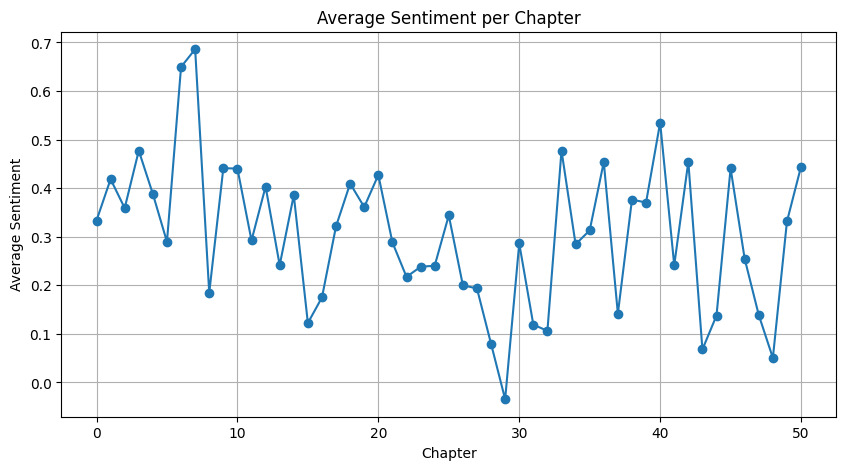

In [ ]:
# Add the information to our dataframe
sense_sensibility_df = sense_sensibility_df.assign(nltk_sentiment = list_nltk_sentiments)

# Convert sentiment values to numeric values
sense_sensibility_df['sentiment_value'] = sense_sensibility_df['nltk_sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})
non_neutral_df = sense_sensibility_df[sense_sensibility_df['sentiment_value'] != 0]

# Calculate the average sentiment per chapter
avg_sentiment_per_chapter = non_neutral_df.groupby('chapter')['sentiment_value'].mean().reset_index()

# Plot the average sentiment per chapter
plt.figure(figsize=(10, 5))
plt.plot(avg_sentiment_per_chapter['chapter'], avg_sentiment_per_chapter['sentiment_value'], marker='o')
plt.xlabel('Chapter')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment per Chapter')
plt.grid()
plt.show()

Let's visualize the same thing using a more appealing and interactive plot.

In [ ]:
!pip install plotly --quiet

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Convert sentiment values to numeric values
sense_sensibility_df['sentiment_value'] = sense_sensibility_df['nltk_sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})
non_neutral_df = sense_sensibility_df[sense_sensibility_df['sentiment_value'] != 0]

# Calculate the average sentiment per chapter
avg_sentiment_per_chapter = non_neutral_df.groupby('chapter')['sentiment_value'].mean().reset_index()

# Create the interactive line plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=avg_sentiment_per_chapter['chapter'],
                         y=avg_sentiment_per_chapter['sentiment_value'],
                         mode='lines+markers',
                         name='Average Sentiment'))

fig.update_layout(title='Average Sentiment per Chapter',
                  xaxis_title='Chapter',
                  yaxis_title='Average Sentiment',
                  hovermode='x')

fig.show()

## Sentiment Analysis using Deep Learning

Deep learning has seen tremendous advances in the language domain in the past years, making all state of the art text classification / sentiment analysis models be DL models.

We are going to make use of pretrained deep learning models. One weakness of such models (becoming less and less obvious with the appearance of Large Language Models e.g. GPT4) is that these models usually perform best on the task they were trained for.

E.g. If you train a model for sentiment analysis on movie reviews from IMDB it's very likely that it'll perform well in determing movie reviews sentiment + general reviews sentiment. However, it's likely that the same model will perform poorly in determining the sentiment of a Shakespeare play.


### Transformers - Pretrained Models
"🤗 Transformers provides thousands of pretrained models to perform tasks on different modalities such as text, vision, and audio." - coming from Hugging Face's Transformers pip page.

Training Deep Learning models is outside of the scope of Data Mining and takes significant time/resources. Luckily for us there are a lot of pretrained models out there that Hugging Face makes available for use directly in python.
We're going to use some of these models next.

In [ ]:
!pip install transformers --quiet

In [ ]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis") # Defaults to https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english model - visit for more info, trained on https://huggingface.co/datasets/sst2
text = "I had a fantastic time at the concert."
result = sentiment_pipeline(text)
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9998733997344971}]


In [ ]:
text = "I had a horrible time at the concert."
result = sentiment_pipeline(text)
print(result)

text = "I had a fantastic time at the concert. Almost died though."
result = sentiment_pipeline(text)
print(result)

[{'label': 'NEGATIVE', 'score': 0.999609649181366}]
[{'label': 'NEGATIVE', 'score': 0.9058051705360413}]


Here's a different model that is able to predict 7 different emotions:
* anger 🤬
* disgust 🤢
* fear 😨
* joy 😀
* neutral 😐
* sadness 😭
* surprise 😲


In [ ]:
from transformers import pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=None) # https://huggingface.co/j-hartmann/emotion-english-distilroberta-base
classifier("I love this!")

[[{'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'surprise', 'score': 0.00852868054062128},
  {'label': 'neutral', 'score': 0.005764583125710487},
  {'label': 'anger', 'score': 0.004419785924255848},
  {'label': 'sadness', 'score': 0.002092392183840275},
  {'label': 'disgust', 'score': 0.0016119909705594182},
  {'label': 'fear', 'score': 0.0004138524236623198}]]

In [ ]:
classifier("That was absolutely disgusting")

[[{'label': 'disgust', 'score': 0.9869235157966614},
  {'label': 'anger', 'score': 0.004495017230510712},
  {'label': 'fear', 'score': 0.003422113135457039},
  {'label': 'neutral', 'score': 0.002378593198955059},
  {'label': 'sadness', 'score': 0.0016001604963093996},
  {'label': 'surprise', 'score': 0.000860038970131427},
  {'label': 'joy', 'score': 0.0003206328547094017}]]

### Exercise 3. Explore Twitter Sentiment - How was ChatGPT perceived at the start of 2023?
\**Because you'd each need to create individual accounts on twitter to scrape data, we'll instead use an existing dataset of real tweets*

\**Because running these pretrained models takes quite a bit of time on CPU, we'll only look at samples of 100 tweets in our investigations. If you have access to a GPU and want to run the investigation on all data, feel free to do so.*



1. Create a dataframe called first_100_en_tweets that will store the first 100 tweets that are in English.
2. Create a dataframe called first_100_de_tweets that will store the first 100 tweets that are in French.
3. Add the sentiment values for each tweets in these dataframes (in a new "sentiment" column).

 *Head out to https://huggingface.co/models?pipeline_tag=text-classification and find a French language sentiment model for the FR tweets*. For the English ones you can use the model commented below.
4. Calculate separately the average sentiment for the 100 EN tweets and for the 100 FR tweets and see which audience seems to like ChatGPT more.
5. Find the user with the highest total followers count, check if his tweets are on average positive or negative.

In [ ]:
# English Tweets Sentiment Model
sentiment_pipeline = pipeline("text-classification", model='ProsusAI/finbert')
french_sentiment_pipeline = pipeline("text-classification", model = 'ac0hik/Sentiment_Analysis_French')


In [ ]:
tweets = pd.read_csv('chatgpt_daily_tweets.csv')
tweets

#1
first_100_en_tweets  = tweets[tweets['lang'] == 'en'].head(100)
first_100_en_tweets


#2
first_100_de_tweets  = tweets[tweets['lang'] == 'fr'].head(100)
first_100_de_tweets

#3

sentiment_list_en = [sentiment_pipeline(word)[0]['score'] for word in first_100_en_tweets['text']]
first_100_en_tweets['Sentiments'] = sentiment_list_en
first_100_en_tweets.head()

sentiment_list_de = [sentiment_pipeline(word)[0]['score'] for word in first_100_de_tweets['text']]
first_100_de_tweets['Sentiments'] = sentiment_list_de
first_100_de_tweets.head()




,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_name,user_username,user_location,user_description,...,user_followers_count,user_following_count,user_tweet_count,user_verified,source,retweet_count,like_count,reply_count,impression_count,Sentiments
11,1.642754e+18,2023-04-03 04:59:58+00:00,06:53.4,RT @CerfiaFR: 🤖 FLASH | Grâce à #GTP3 et #GPT4...,fr,1113695587038265344,Ce.HBT_ntech,HUBERTCdric3,NaN,NaN,...,21,41,200,False,NaN,3525,0,0,0,0.853067
13,1.642814e+18,2023-04-03 08:59:52+00:00,06:57.4,RT @SansTabac92: Un médecin passe à côté du di...,fr,382302326,Alain,akr54121,NaN,"Hockey, foot, hockey, échecs, hockey ⛸🏒\nSouti...",...,93,222,3651,False,NaN,1,0,0,0,0.889043
18,1.643010e+18,2023-04-03 21:59:00+00:00,07:11.7,DBZ en septième position ? Mdrr la source?? Vo...,fr,2639636154,Il salotto di Ceci Simo - magazine,wordsandmore1,Italy,Magazine di cultura e informazione. Il salotto...,...,1710,1692,98682,False,NaN,0,8,4,730,0.907380
19,1.642965e+18,2023-04-03 18:59:29+00:00,07:08.3,RT @gaspardooo: Mais il a craqué ChatGPT ??? h...,fr,1642963596069212160,そら,vd9fl,NaN,AIやNFTの事など学習し発信。,...,16,16,27,False,NaN,2080,0,0,0,0.934770
20,1.642814e+18,2023-04-03 08:59:51+00:00,06:57.4,RT @CerfiaFR: 🤖 FLASH | Grâce à #GTP3 et #GPT4...,fr,3322855155,Chéyenne,BathelierC,NaN,|F|ille |O|rginal |L|ouable |L|umineuse |E|pat...,...,22,38,441,False,NaN,3525,0,0,0,0.853067


In [ ]:

#4
average_sentiment_score_en = first_100_en_tweets['Sentiments'].mean()
print(f"Average score for English Tweets : {average_sentiment_score_en}")

average_sentiment_score_de = first_100_de_tweets['Sentiments'].mean()
print(f"Average score for French Tweets : {average_sentiment_score_de}")



Average score for English Tweets : 0.8445677357912064
Average score for French Tweets : 0.8210578778386116


# Word Clouds
Word clouds are a beautiful, fun and useful way of representing and viewing text data. We’ve probably all seen one before. The basic concept is that of showing the most frequently appearing words in a piece of text and to scale these words proportionally to their frequency of appearance (e.g. a word appearing 500 times will have a higher font size and will be more obvious in the word cloud than a word appearing 100 times).

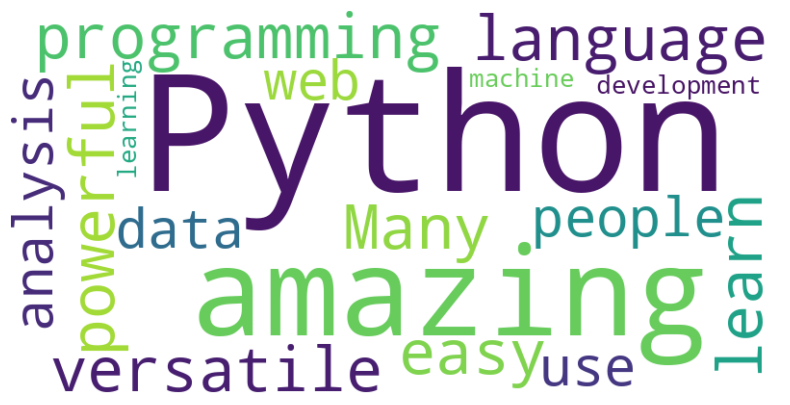

In [ ]:
!pip install wordcloud --quiet
from wordcloud import WordCloud, STOPWORDS

# Sample text
text = "Python is an amazing programming language. It is versatile, powerful, and easy to learn. Many people use Python for data analysis, web development, and machine learning."

# Create a set of stopwords
stopwords = set(STOPWORDS)

# Create a WordCloud object
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=50, width=800, height=400)

# Generate the word cloud from the text
wordcloud.generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Let's use a transparent .png image to give a specific shape to our word cloud.

In [ ]:
import requests
import string

# URL of the book you want to download
book_url = 'https://www.gutenberg.org/cache/epub/11/pg11.txt'

# Send a GET request to the URL and download the text
response = requests.get(book_url)
alice_in_wonderland_text = response.text

# Uncomment this if you encounter weird characters
# Remove unwanted characters from the text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
alice_in_wonderland_text = ''.join(c for c in alice_in_wonderland_text if c in allowed_chars)

# Print the first 5000 characters of the book text
print(alice_in_wonderland_text[:5000])

The Project Gutenberg eBook of Alices Adventures in Wonderland
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever You may copy it give it away or reuse it under the terms
of the Project Gutenberg License included with this ebook or online
at wwwgutenbergorg If you are not located in the United States
you will have to check the laws of the country where you are located
before using this eBook

Title Alices Adventures in Wonderland

Author Lewis Carroll

Release date June 27 2008 eBook 11
                Most recently updated February 4 2024

Language English

Credits Arthur DiBianca and David Widger


 START OF THE PROJECT GUTENBERG EBOOK ALICES ADVENTURES IN WONDERLAND 
Illustration




Alices Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 30

Contents

 CHAPTER I     Down the RabbitHole
 CHAPTER II    The Pool of Tears
 CHAPTER III   A CaucusRace and 

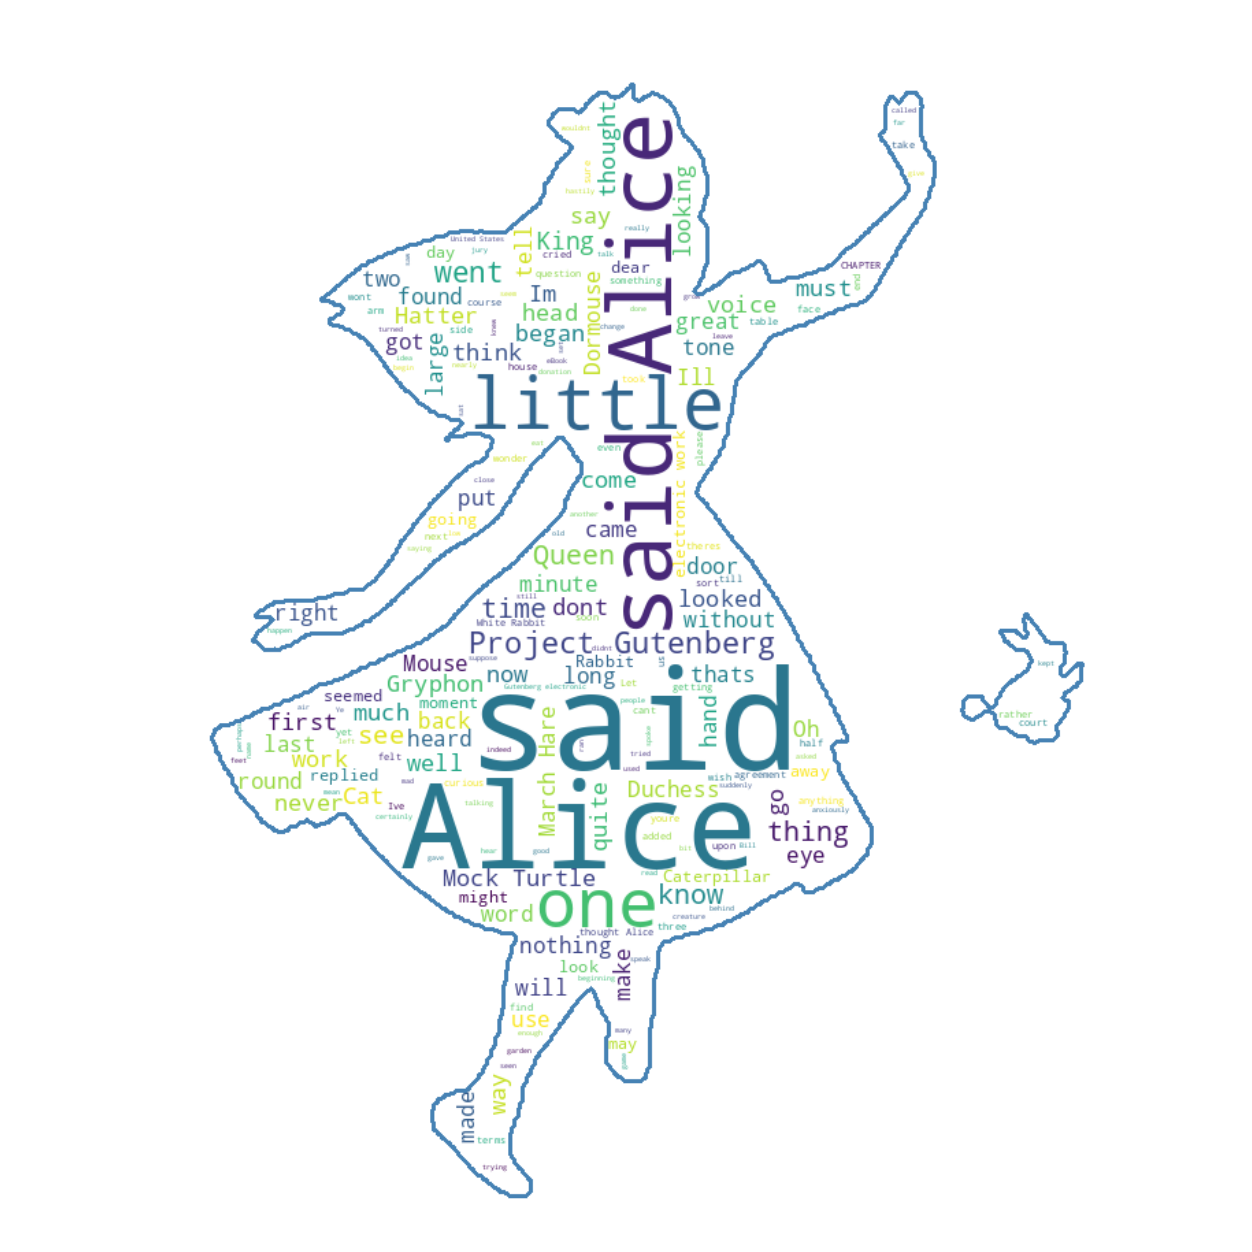

In [ ]:
# We have the posibility of shaping the word cloud based on an image
import numpy as np
from PIL import Image
image_mask = np.array(Image.open("image_mask.png"))
wordcloud = WordCloud(background_color='white', mask=image_mask, width=2000, height=1800, contour_width=3, contour_color='steelblue').generate(alice_in_wonderland_text)
plt.figure(figsize = (16, 16), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

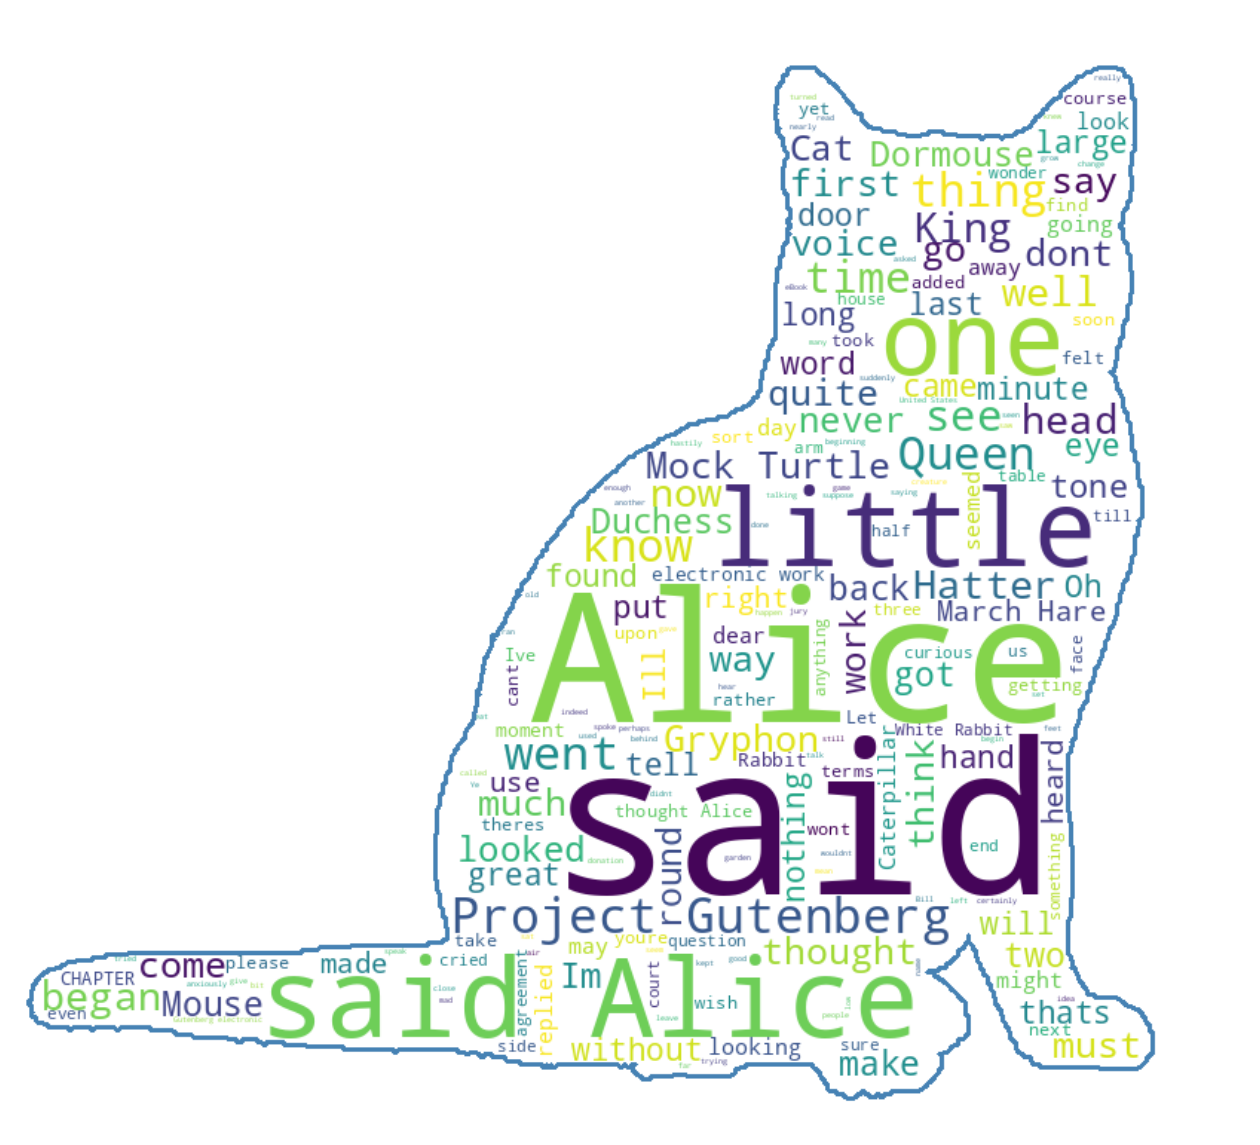

In [ ]:
# We have to specify a transparent .png image to serve as a mask in order to get our shapes.
# The png image needs to have pixel values = 255 rather than 0 in order to work.

# Here's an example of how to do that
mask = np.array(Image.open("cat.png"))
mask[mask == 0] = 255

import numpy as np
from PIL import Image
wordcloud = WordCloud(background_color='white', mask=mask, width=1000, height=900, contour_width=3, contour_color='steelblue').generate(alice_in_wonderland_text)
plt.figure(figsize = (16, 16), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Exercise 4 - Visualize word clouds
**Option A**

1. Put together the text of all of the tweets coming from the first_100_en_tweets dataframe.
2. Draw a word cloud from (the merged text of) all the tweets in the dataframe.
3. Draw a word cloud from all the positive tweets in the dataframe.

    `Use colormap='Set2' as a parameter when creating the WordCloud() for ex. 4.3.`
4. Draw a word cloud from all the negative tweets in the dataframe using a custom png image of your own (different than the 2 example ones).

**Option B**
1. Put into a dataframe the text coming from 200 reddit comments coming from a post of your choice.
2. Draw a word cloud from (the merged text of) all the comments in the dataframe.
3. Draw a word cloud from all the positive comments in the dataframe.

    `Use colormap='Set2' as a parameter when creating the WordCloud() for ex. 4.3.`
4. Draw a word cloud from all the negative comments in the dataframe **using a custom png image of your own** (different than the 2 example ones).

*Good to know: World clouds also have a generate_from_frequencies() method of generating the cloud. This expects a dictionary of form {'word_a' : 20, 'word_b' : 3, 'word_c' : 120, etc.} as input where words _a, _b and _c are the words and 20, 3, 120 are their respective occurrence frequency.
Dataframes can be transformed into dictionaries - e.g. .to_dict()*

In [ ]:
# Write your code below -- B

!pip install praw --quiet

import praw
import pandas as pd

client_id='sIXZTihLNiKiHw'
client_secret='EjfAsmz5z8mDbZohe4UPYTPIZsYmOQ'
user_agent='Test1'

reddit = praw.Reddit(client_id = client_id, client_secret = client_secret, user_agent = user_agent, check_for_async=False)

subreddit_hot = reddit.subreddit('Science').hot(limit=10)

post_data = []

for post in subreddit_hot:
  comments = post.comments.replace_more(limit=None)
  comments_list = post.comments.list()
  if len(comments_list) >= 200:
    for comment in comments_list[:200]:
      post_data.append([comment.body])

    break
posts_data = pd.DataFrame(post_data, columns = ['Comments'])
posts_data









,Comments
0,Welcome to r/science! This is a heavily modera...
1,The word sextile just feels like putting the b...
2,[removed]
3,[removed]
4,[removed]
...,...
195,And they need that medical care less since the...
196,A good point.\n\nOutside of extreme cases wher...
197,Things like a big nose and wide face can also ...
198,"Yes, the correlation between the more genetica..."


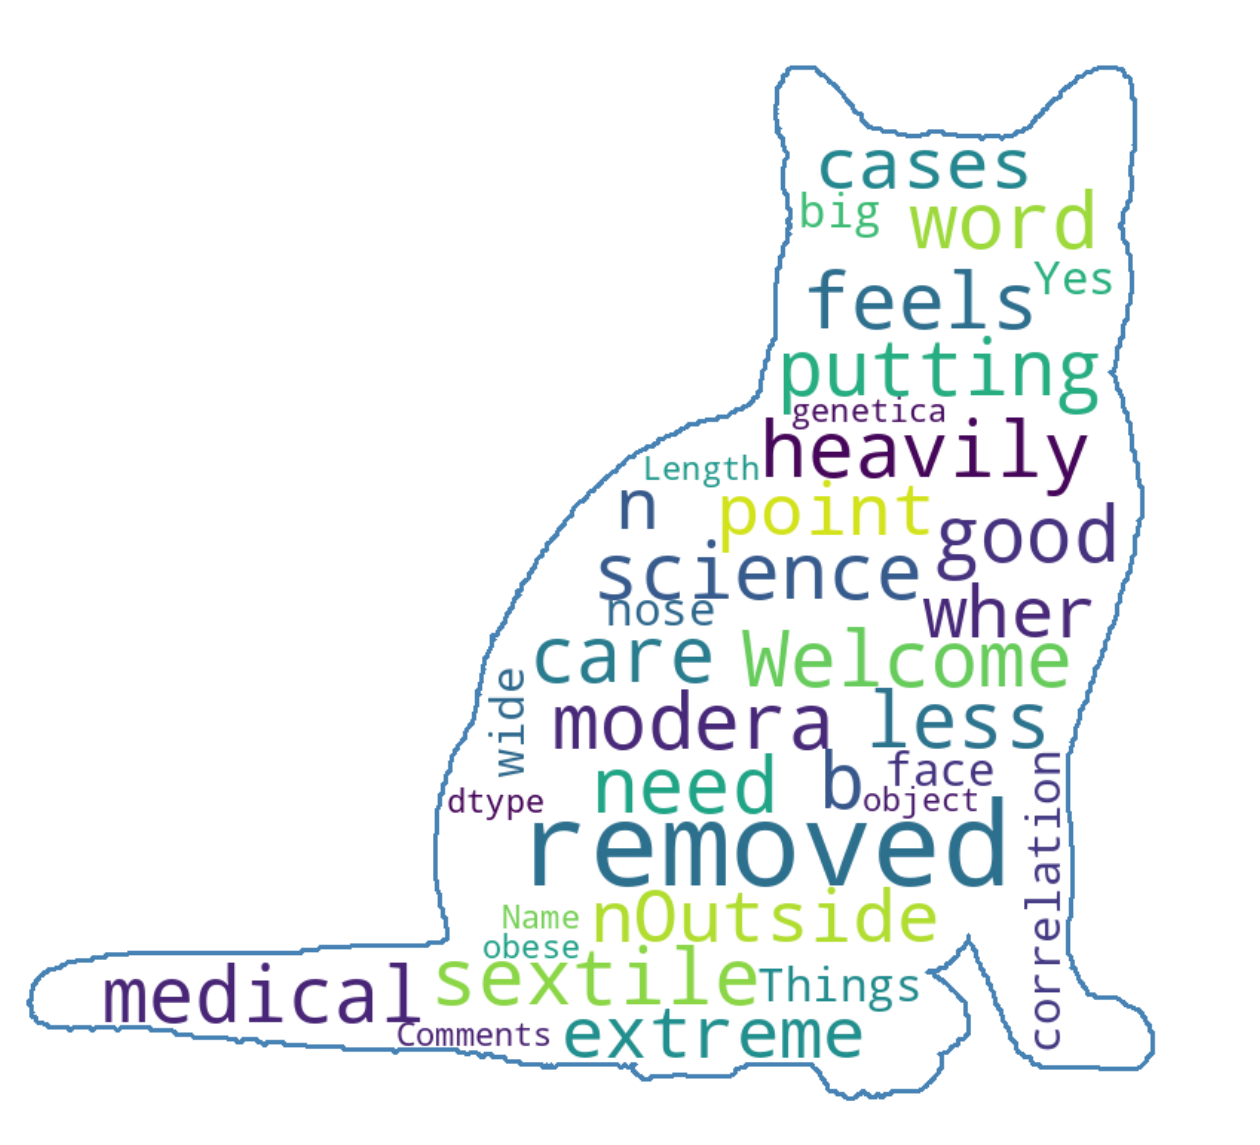

In [ ]:
import numpy as np
from PIL import Image

mask = np.array(Image.open("cat.png"))
mask[mask == 0] = 255

wordcloud = WordCloud(background_color='white', mask=mask, width=1000, height=900, contour_width=3, contour_color='steelblue').generate(str(posts_data['Comments']))
plt.figure(figsize = (16, 16), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
"""Draw a word cloud from all the positive comments in the dataframe.

Use colormap='Set2' as a parameter when creating the WordCloud() for ex. 4.3."""
!pip install transformers --quiet
from transformers import pipeline


In [ ]:
"""Good to know: World clouds also have a generate_from_frequencies() method of generating the cloud.
This expects a dictionary of form {'word_a' : 20, 'word_b' : 3, 'word_c' : 120, etc.} as input where words _a, _b and _c are
the words and 20, 3, 120 are their respective occurrence frequency. Dataframes can be transformed into dictionaries - e.g. .to_dict()"""

sentiments_pipeline = pipeline("sentiment-analysis")
sentiments_list = ['positive' if result['label'] == 'POSITIVE' else 'negative' for comment in posts_data['Comments'] for result in [sentiments_pipeline(comment)[0]]]
posts_data['Sentiments'] = sentiments_list
posts_data.head(100)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,Comments,Sentiments
0,Welcome to r/science! This is a heavily modera...,negative
1,The word sextile just feels like putting the b...,negative
2,[removed],negative
3,[removed],negative
4,[removed],negative
...,...,...
95,Isn’t reproductive fitness at the root of bein...,negative
96,Probably because they are fat.\n\nAtleast some...,negative
97,MY study says that some of the most messed up ...,positive
98,Beauty is the most fascist concept to ever exi...,negative


In [ ]:
positive_sentiments_list = posts_data[posts_data['Sentiments'] == 'positive']
print(positive_sentiments_list)

                                              Comments Sentiments
6    Being attractive means also being in good heal...   positive
7    Did they adjust for weight? Normal-weight peop...   positive
8    Yes, but this is nothing new, good looks have ...   positive
13   Attractiveness is just our subconscious mind p...   positive
15   I could have guessed that without studying it....   positive
20   The more attractive you are, the healthier you...   positive
23   I was voted most handsome my senior year. Does...   positive
25   Doesn’t it really just come back to socioecono...   positive
26   Joke on them I was an ugly duckling. Life has ...   positive
28                           "Survival of the fittest"   positive
29   We are all thinking it so I'll just say it.......   positive
30             In other words: Good genes are visible.   positive
33           Life insurance companies are taking note.   positive
34   Generally attractiveness = health. When people...   positive
36   When 

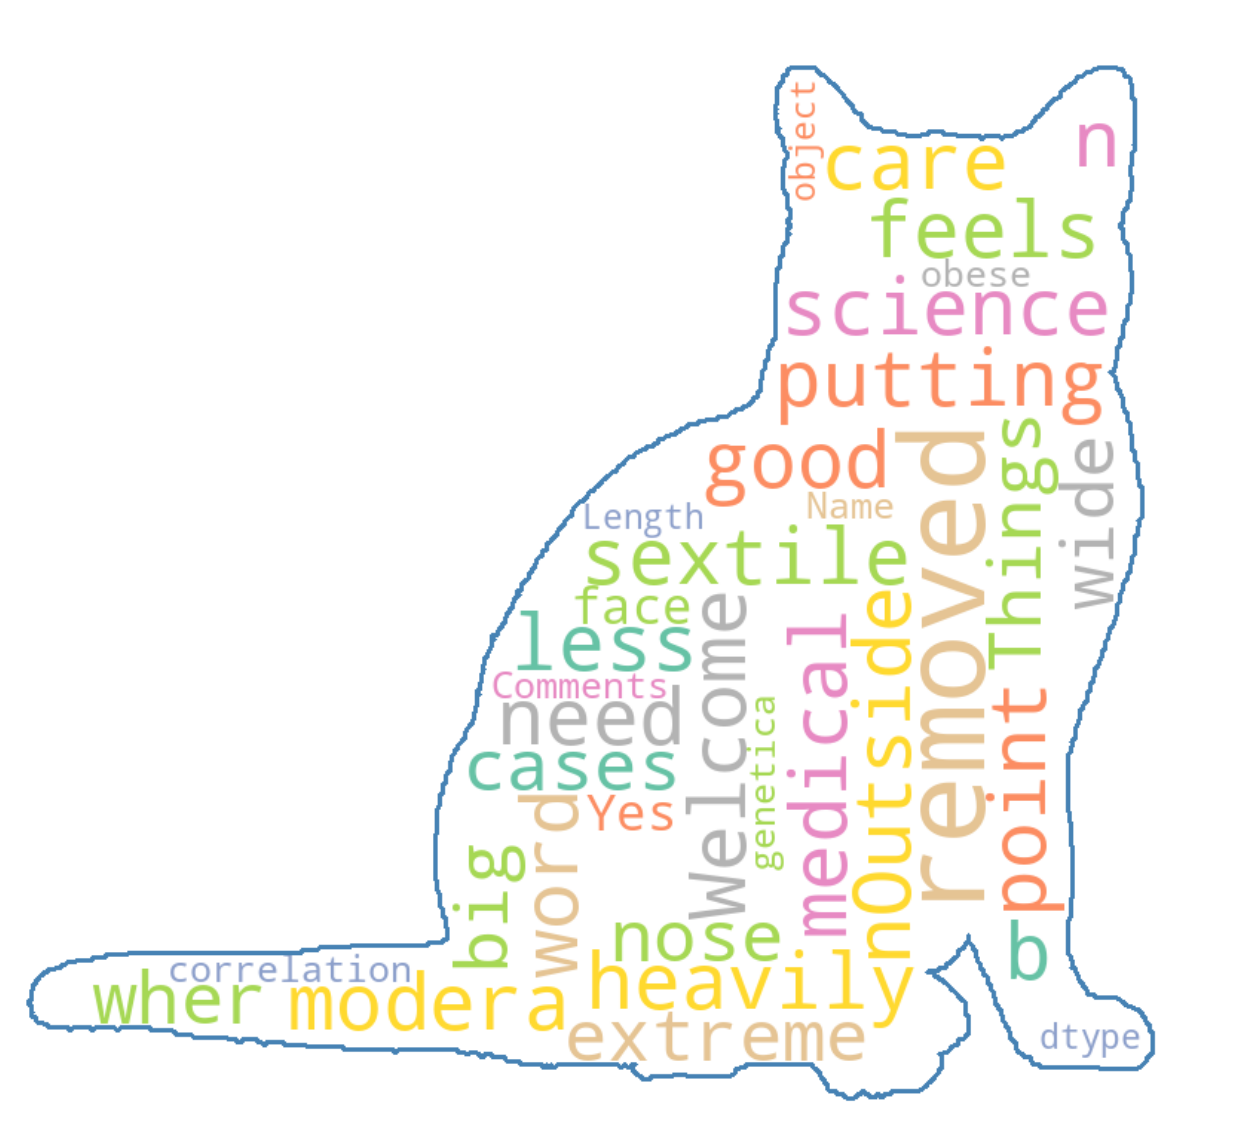

In [ ]:
import numpy as np
from PIL import Image

mask = np.array(Image.open("cat.png"))
mask[mask == 0] = 255

wordcloud = WordCloud(colormap='Set2', background_color='white', mask=mask, width=2000, height=1000, contour_width=3, contour_color='steelblue').generate(str(posts_data['Comments']))
plt.figure(figsize = (16, 16), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

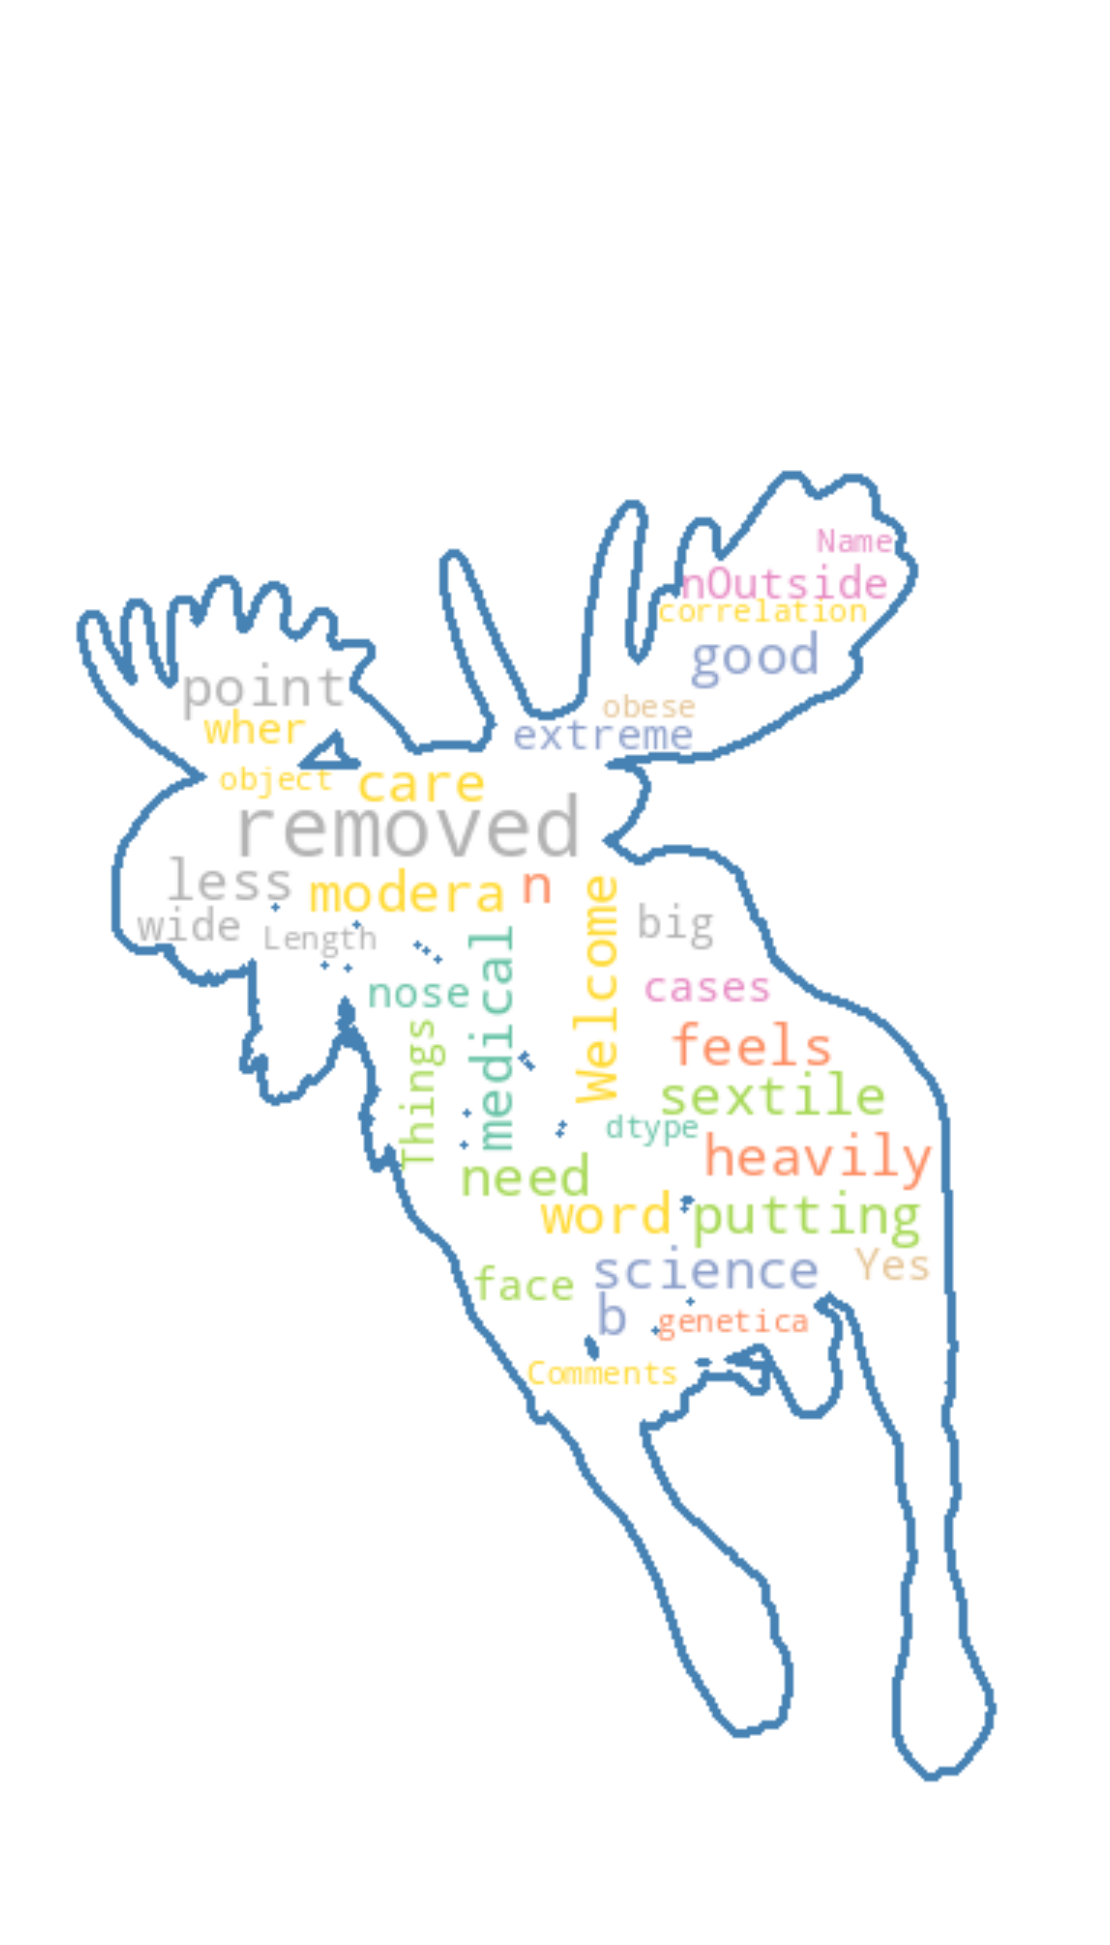

In [ ]:
negative_sentiments_list = posts_data[posts_data['Sentiments'] == 'negative']

import numpy as np
from PIL import Image

mask = np.array(Image.open("moose.png"))
mask[mask == 0] = 255

wordcloud = WordCloud(colormap='Set2', background_color='white', mask=mask, width=2000, height=1000, contour_width=3, contour_color='steelblue').generate(str(posts_data['Comments']))
plt.figure(figsize = (25, 25), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()